## 2D permanent case

This notebook aims to solve the heat diffusion equation defined by

$$ Lap(T) = 0$$
$$or$$
$$\frac{\partial^2T}{\partial x^2} + \frac{\partial^2T}{\partial y^2} = 0$$

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import tri, cm

#### Simulation Parameters

In [2]:
# Simulation Parameters
nx = 20
ny = 20
Lx = 1.0
Ly = 1.0
alpha = 1.0
rho = 1.0
cv = 1.0
Q = 0*rho*cv
npoints = nx*ny
ne = 2*(nx-1)*(ny-1)

#### Mesh Generation

In [3]:
Xv = np.linspace(0,Lx,nx)
Yv = np.linspace(0,Ly,ny)

X,Y = np.meshgrid(Xv,Yv)

X = np.reshape(X,npoints)
Y = np.reshape(Y,npoints)

triang = tri.Triangulation(X,Y)
IEN = triang.triangles

In [4]:
# nos de condicao de contorno
cc1 = np.arange(           start = 0,           stop = nx,  step = 1) # bottom 
cc2 = np.arange(          start = nx, stop = npoints - nx, step = nx) # left
cc3 = np.arange(start = npoints - nx,      stop = npoints,  step = 1) # top
cc4 = np.arange(    start = 2*nx - 1, stop = npoints - nx, step = nx) # right

cc = np.hstack([cc1,cc2,cc3,cc4])

In [5]:
# K and M matrices
K = np.zeros((npoints,npoints), dtype = float)
M = np.zeros((npoints,npoints), dtype = float)

for e in range(0,ne):
 # element matrices
 v1, v2, v3 = IEN[e]

 area = 0.5*np.linalg.det(np.array([[1,X[v1],Y[v1]],
                                    [1,X[v2],Y[v2]],
                                    [1,X[v3],Y[v3]]]))
 
 melem = (area/12.0)*np.array([[2,1,1],
                               [1,2,1],
                               [1,1,2]])
 
 bi = Y[v2]-Y[v3]
 bj = Y[v3]-Y[v1]
 bk = Y[v1]-Y[v2]
 ci = X[v3]-X[v2]
 cj = X[v1]-X[v3]
 ck = X[v2]-X[v1]

 kxelem = (alpha/(4*area))*np.array([[bi*bi,bi*bj,bi*bk],
                                     [bj*bi,bj*bj,bj*bk],
                                     [bk*bi,bk*bj,bk*bk]])
 
 kyelem = (alpha/(4*area))*np.array([[ci*ci,ci*cj,ci*ck],
                                     [cj*ci,cj*cj,cj*ck],
                                     [ck*ci,ck*cj,ck*ck]])
 kelem = kxelem + kyelem

 for ilocal in range(3):
    iglobal = IEN[e,ilocal]

    for jlocal in range(3):
        jglobal = IEN[e,jlocal]

        K[iglobal,jglobal] += kelem[ilocal,jlocal]
        M[iglobal,jglobal] += melem[ilocal,jlocal]

In [6]:
qvec = np.full(npoints, Q/(rho*cv) ,dtype='float' )

A = K.copy()
b = M@qvec

In [7]:
# imposicao das condicoes de contorno de Dirichlet
#-------------------------------------------------- 
# bottom boundary
for i in cc1:
 A[i,:] = 0.0
 A[i,i] = 1.0

# left boundary
for i in cc2:
 A[i,:] = 0.0
 A[i,i] = 1.0

# top boundary
for i in cc3:
 A[i,:] = 0.0
 A[i,i] = 1.0

# right boundary
for i in cc4:
 A[i,:] = 0.0
 A[i,i] = 1.0

In [8]:
# linear system solution
# first, we inverse the A matrix
Ainv = np.linalg.inv(A)

### Test #1: Constant on X axis

In [9]:
# Boundary conditions
T1 = lambda x : 0        # bottom
T2 = lambda y : 100*y/Ly # left
T3 = lambda x : 100      # top
T4 = lambda y : 100*y/Ly # right

In [10]:
# Dirichlet boundary conditions
#-------------------------------------------------- 
# bottom boundary
for i in cc1:
 b[i] = T1(X[i])

# left boundary
for i in cc2:
 b[i] = T2(Y[i])

# top boundary
for i in cc3:
 b[i] = T3(X[i])

# right boundary
for i in cc4:
 b[i] = T4(Y[i])

In [11]:
T = Ainv@b

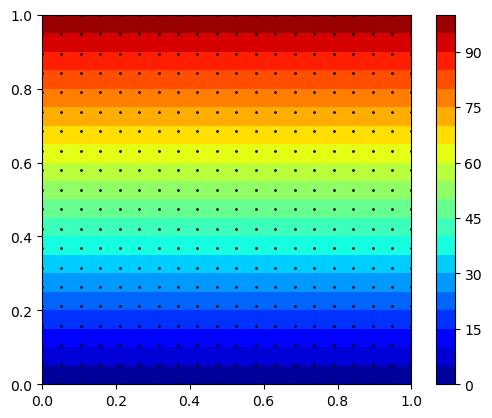

In [12]:
# For graphical purposes
Tmin = min(T)
Tmax = max(T)

# Temperature contourplot
ax = plt.axes()
ax.set_aspect('equal')
ax.triplot(triang,'ko-', markersize = 1)
surf = ax.tricontourf(triang,T,cmap='jet', levels = np.linspace(Tmin, Tmax, 21))
plt.colorbar(surf)
plt.show()

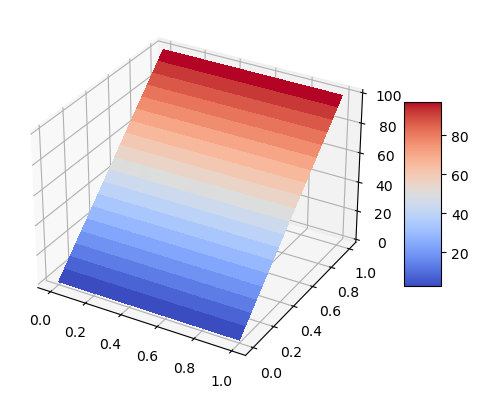

In [13]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
Xz = np.reshape(X, (nx, ny))
Yz = np.reshape(Y, (nx, ny))
Tz = np.reshape(T, (nx, ny))

# Plot the surface.
surf = ax.plot_surface(Xz, Yz, Tz, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [14]:
referenceFunction = lambda x,y : 100*y/Ly

In [15]:
MSQError = np.sqrt(sum((referenceFunction(X, Y) - T)**2)/T.shape[0])

print('Mean squared error:  {:.2e}'.format(MSQError))

Mean squared error:  2.04e-14


### Test #2: Constant on Y axis

In [16]:
# Boundary conditions
T1 = lambda x : 100*x/Lx # bottom
T2 = lambda y : 0        # left
T3 = lambda x : 100*x/Lx # top
T4 = lambda y : 100      # right

In [17]:
# Dirichlet boundary conditions
#-------------------------------------------------- 
# bottom boundary
for i in cc1:
 b[i] = T1(X[i])

# left boundary
for i in cc2:
 b[i] = T2(Y[i])

# top boundary
for i in cc3:
 b[i] = T3(X[i])

# right boundary
for i in cc4:
 b[i] = T4(Y[i])

In [18]:
T = Ainv@b

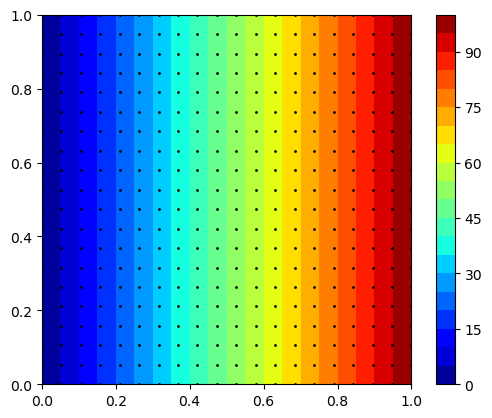

In [19]:
# For graphical purposes
Tmin = min(T)
Tmax = max(T)

# Temperature contourplot
ax = plt.axes()
ax.set_aspect('equal')
ax.triplot(triang,'ko-', markersize = 1)
surf = ax.tricontourf(triang,T,cmap='jet', levels = np.linspace(Tmin, Tmax, 21))
plt.colorbar(surf)
plt.show()

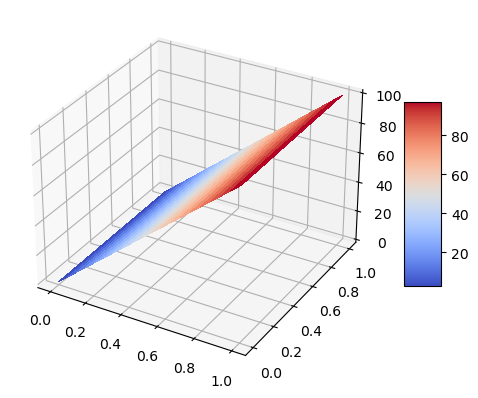

In [20]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
Xz = np.reshape(X, (nx, ny))
Yz = np.reshape(Y, (nx, ny))
Tz = np.reshape(T, (nx, ny))

# Plot the surface.
surf = ax.plot_surface(Xz, Yz, Tz, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [21]:
referenceFunction = lambda x,y : 100*x/Lx

In [22]:
MSQError = np.sqrt(sum((referenceFunction(X, Y) - T)**2)/T.shape[0])

print('Mean squared error:  {:.2e}'.format(MSQError))

Mean squared error:  2.61e-14


### Test #3: Manufactured solution

The manufactured solution will be following the equation: 

$$ T(x, y) = (x - 0.5)^2 + (y - 0.5)^2

In [23]:
# Boundary conditions
T1 = lambda x : (x - 0.5)**2 + 0.25 # bottom
T2 = lambda y : (y - 0.5)**2 + 0.25 # left
T3 = lambda x : (x - 0.5)**2 + 0.25 # top
T4 = lambda y : (y - 0.5)**2 + 0.25 # right

In [24]:
Q = -4*rho*cv

qvec = np.full(npoints, Q/(rho*cv) ,dtype='float' )

b = M@qvec

In [25]:
# Dirichlet boundary conditions
#-------------------------------------------------- 
# bottom boundary
for i in cc1:
 b[i] = T1(X[i])

# left boundary
for i in cc2:
 b[i] = T2(Y[i])

# top boundary
for i in cc3:
 b[i] = T3(X[i])

# right boundary
for i in cc4:
 b[i] = T4(Y[i])

In [26]:
T = Ainv@b

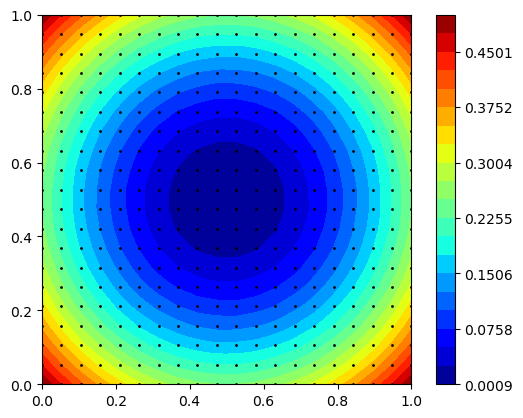

In [27]:
# For graphical purposes
Tmin = min(T)
Tmax = max(T)

# Temperature contourplot
ax = plt.axes()
ax.set_aspect('equal')
ax.triplot(triang,'ko-', markersize = 1)
surf = ax.tricontourf(triang,T,cmap='jet', levels = np.linspace(Tmin, Tmax, 21))
plt.colorbar(surf)
plt.show()

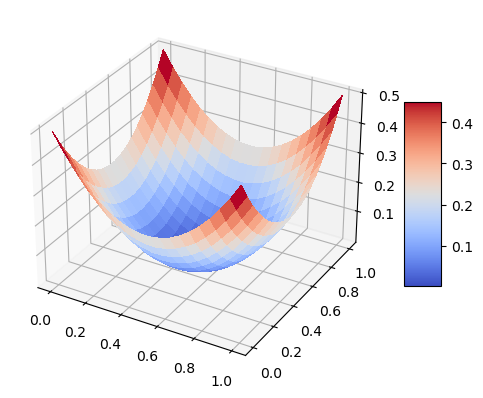

In [28]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
Xz = np.reshape(X, (nx, ny))
Yz = np.reshape(Y, (nx, ny))
Tz = np.reshape(T, (nx, ny))

# Plot the surface.
surf = ax.plot_surface(Xz, Yz, Tz, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [29]:
referenceFunction = lambda x,y : (x - 0.5)**2 + (y - 0.5)**2

In [30]:
MSQError = np.sqrt(sum((referenceFunction(X, Y) - T)**2)/T.shape[0])

print('Mean squared error:  {:.2e}'.format(MSQError))

Mean squared error:  3.82e-04


### Test #4: Uneven mesh

With boundary conditions:

$$T_{bottom} = 50 $$
$$T_{left} = 0 $$
$$T_{top} = 30 $$
$$T_{right} = 100 $$

In [31]:
Xv = np.sin(np.linspace(0, np.pi/2, nx))*Lx
Yv = np.sin(np.linspace(0, np.pi/2, ny))*Ly

In [32]:
X,Y = np.meshgrid(Xv,Yv)

X = np.reshape(X,npoints)
Y = np.reshape(Y,npoints)

triang = tri.Triangulation(X,Y)
IEN = triang.triangles

In [33]:
# K and M matrices
K = np.zeros((npoints,npoints), dtype = float)
M = np.zeros((npoints,npoints), dtype = float)

for e in range(0,ne):
 # element matrices
 v1, v2, v3 = IEN[e]

 area = 0.5*np.linalg.det(np.array([[1,X[v1],Y[v1]],
                                    [1,X[v2],Y[v2]],
                                    [1,X[v3],Y[v3]]]))
 
 melem = (area/12.0)*np.array([[2,1,1],
                               [1,2,1],
                               [1,1,2]])
 
 bi = Y[v2]-Y[v3]
 bj = Y[v3]-Y[v1]
 bk = Y[v1]-Y[v2]
 ci = X[v3]-X[v2]
 cj = X[v1]-X[v3]
 ck = X[v2]-X[v1]

 kxelem = (alpha/(4*area))*np.array([[bi*bi,bi*bj,bi*bk],
                                     [bj*bi,bj*bj,bj*bk],
                                     [bk*bi,bk*bj,bk*bk]])
 
 kyelem = (alpha/(4*area))*np.array([[ci*ci,ci*cj,ci*ck],
                                     [cj*ci,cj*cj,cj*ck],
                                     [ck*ci,ck*cj,ck*ck]])
 kelem = kxelem + kyelem

 for ilocal in range(3):
    iglobal = IEN[e,ilocal]

    for jlocal in range(3):
        jglobal = IEN[e,jlocal]

        K[iglobal,jglobal] += kelem[ilocal,jlocal]
        M[iglobal,jglobal] += melem[ilocal,jlocal]

In [34]:
Q = 20*rho*cv

qvec = np.full(npoints, Q/(rho*cv) ,dtype='float' )

A = K.copy()
b = M@qvec

In [35]:
# imposicao das condicoes de contorno de Dirichlet
#-------------------------------------------------- 
# bottom boundary
for i in cc1:
 A[i,:] = 0.0
 A[i,i] = 1.0

# left boundary
for i in cc2:
 A[i,:] = 0.0
 A[i,i] = 1.0

# top boundary
for i in cc3:
 A[i,:] = 0.0
 A[i,i] = 1.0

# right boundary
for i in cc4:
 A[i,:] = 0.0
 A[i,i] = 1.0

In [36]:
# linear system solution
# first, we inverse the A matrix
Ainv = np.linalg.inv(A)

In [37]:
# Boundary conditions
T1 = lambda x :  50 # bottom
T2 = lambda y :   0 # left
T3 = lambda x :  30 # top
T4 = lambda y : 100 # right

In [38]:
# Dirichlet boundary conditions
#-------------------------------------------------- 
# bottom boundary
for i in cc1:
 b[i] = T1(X[i])

# left boundary
for i in cc2:
 b[i] = T2(Y[i])

# top boundary
for i in cc3:
 b[i] = T3(X[i])

# right boundary
for i in cc4:
 b[i] = T4(Y[i])

In [39]:
T = Ainv@b

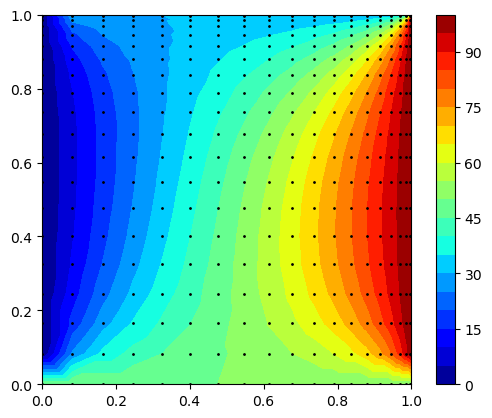

In [40]:
# For graphical purposes
Tmin = min(T)
Tmax = max(T)

# Temperature contourplot
ax = plt.axes()
ax.set_aspect('equal')
ax.triplot(triang,'ko-', markersize = 1)
surf = ax.tricontourf(triang,T,cmap='jet', levels = np.linspace(Tmin, Tmax, 21))
plt.colorbar(surf)
plt.show()

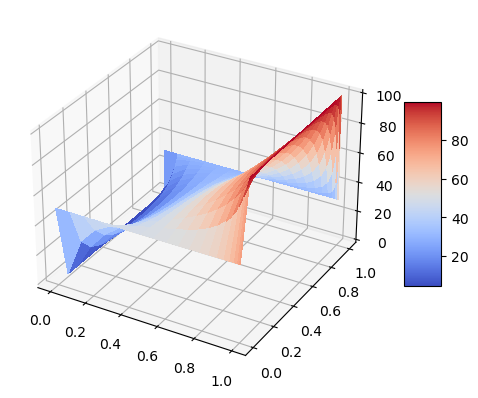

In [41]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
Xz = np.reshape(X, (nx, ny))
Yz = np.reshape(Y, (nx, ny))
Tz = np.reshape(T, (nx, ny))

# Plot the surface.
surf = ax.plot_surface(Xz, Yz, Tz, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()